In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)

import seaborn as sns
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [111]:
#  Цель классификации в прогнозировании успеха подписки клиента (1/0) на срочный депозит (переменная y). 
data=pd.read_csv(r'bank.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape) #(41188 - строк, 21 - столбцов)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [112]:
a=1000*(10-1) #N – номер студента по журналу ; chosen 10
data=data.iloc[a:a+10000,:]

data['education'].unique() #сколько уникальных категорий всего

array(['high.school', 'basic.4y', 'professional.course',
       'university.degree', 'basic.9y', 'basic.6y', 'unknown',
       'illiterate'], dtype=object)

In [113]:
data['education']=np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y',
'Basic', data['education'])

data['education'].unique() #после группировки

array(['high.school', 'Basic', 'professional.course', 'university.degree',
       'unknown', 'illiterate'], dtype=object)

In [114]:
#Исследуем данные
data['y'].value_counts()

y
0    8846
1    1154
Name: count, dtype: int64

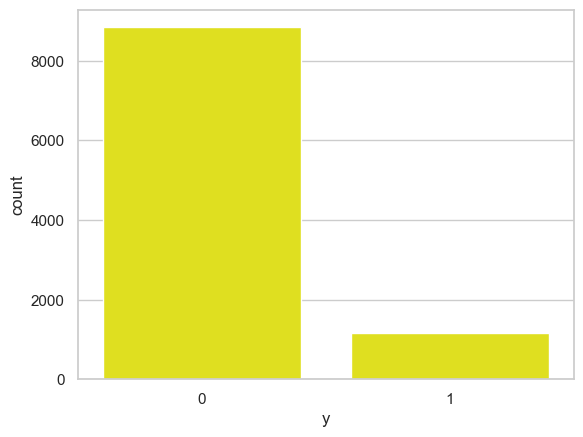

<Figure size 640x480 with 0 Axes>

In [120]:
sns.countplot(x='y', data=data, color='yellow')
plt.show()
plt.savefig('count_plot.png')

In [123]:
count_no_sub = len(data[data['y']==0]) # кол во без подписки
count_sub = len(data[data['y']==1]) # кол во с подпиской
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is -", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription -", pct_of_sub*100)

percentage of no subscription is - 88.46000000000001
percentage of subscription - 11.540000000000001


In [130]:
data.groupby('y').mean('y') #сгруппировали по y
# открывшие вклад - 40+ лет
# pdays у открывших вклад меньше -> возможно купят подписку

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.914538,218.625254,2.611576,986.546688,0.133054,0.234095,93.603050,-40.500837,3.795907,5175.076080
1,41.257366,561.867418,2.052860,783.766898,0.497400,-1.199913,93.373101,-39.907279,2.137128,5095.668544


In [131]:
data.groupby('job').mean('y') 

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.029388,256.290258,2.607890,957.822866,0.187198,-0.003140,93.524266,-40.208857,3.530376,5163.215378,0.131643
blue-collar,39.527068,263.656128,2.516241,986.098311,0.116068,0.257990,93.665300,-41.299740,3.778554,5175.315288,0.066696
entrepreneur,41.332425,250.528610,2.405995,982.762943,0.128065,0.122071,93.600520,-41.329155,3.747210,5174.156131,0.103542
housemaid,45.166038,251.064151,2.792453,954.041509,0.128302,0.493208,93.711921,-39.209057,4.066121,5180.516226,0.086792
management,42.427978,256.163435,2.562327,961.890582,0.184211,-0.031717,93.540733,-40.664404,3.552123,5164.174100,0.119114
retired,62.782609,278.536232,2.371981,883.785024,0.376812,-0.880435,93.394691,-38.141063,2.580382,5111.575121,0.268116
self-employed,40.875371,244.836795,2.427300,978.367953,0.166172,0.097329,93.538724,-40.243620,3.723226,5170.979525,0.089021
services,37.699008,278.617420,2.616318,974.912900,0.177508,0.200110,93.648966,-41.219956,3.720264,5171.730761,0.097023
student,26.079295,248.396476,2.207048,863.409692,0.519824,-1.427753,93.327639,-40.149339,1.899405,5088.832599,0.268722


In [134]:
data.groupby('marital').mean('y') 

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.874236,266.729258,2.565939,965.159825,0.179039,0.133624,93.597229,-40.731965,3.680966,5169.241310,0.107424
married,42.364466,254.307896,2.551593,967.531851,0.155275,0.171848,93.599407,-40.197694,3.730461,5170.852737,0.103683
single,33.146429,262.838571,2.523929,953.244286,0.215000,-0.175250,93.520980,-40.803571,3.306903,5154.010250,0.143929
unknown,41.888889,297.518519,3.148148,925.370370,0.296296,-0.448148,93.345815,-41.614815,3.095778,5156.081481,0.111111


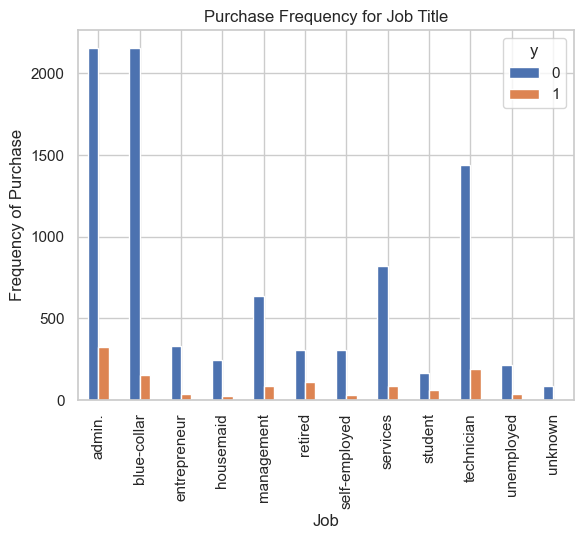

In [136]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job.png') # хорошее прогнозирование

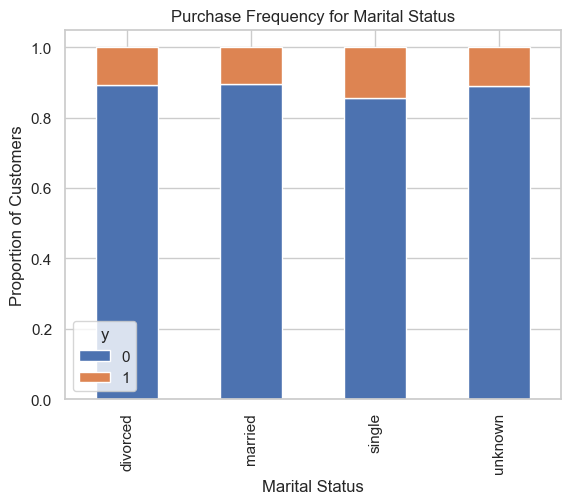

In [139]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_purchase_table.png') # плохое прогнозирование

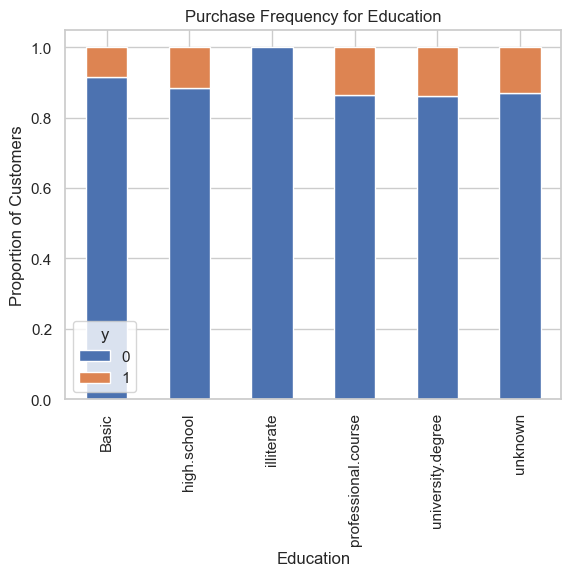

In [140]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('education_purchase_table.png') # нормальное прогнозирование

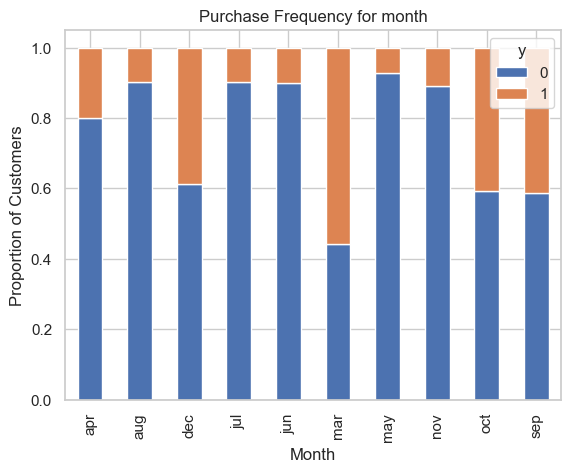

In [141]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase Frequency for month')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
plt.savefig('month_purchase_table.png') # хорошее прогнозирование

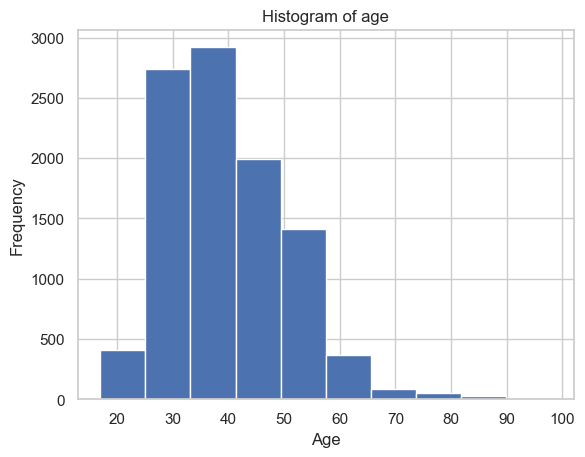

In [144]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_purchase_table.png') # хорошее прогнозирование

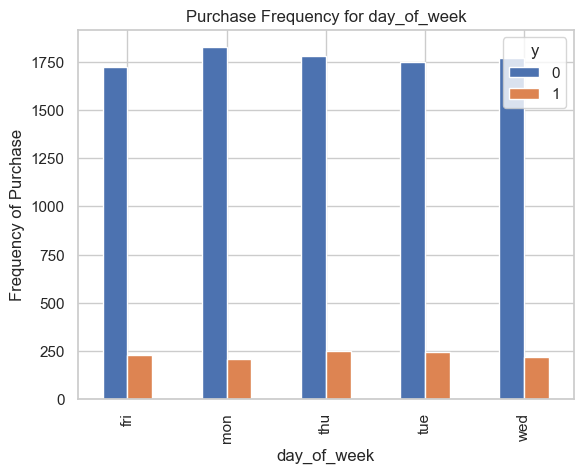

In [147]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Frequency of Purchase')
plt.savefig('day_of_week_purchase_table.png') # плохое прогнозирование

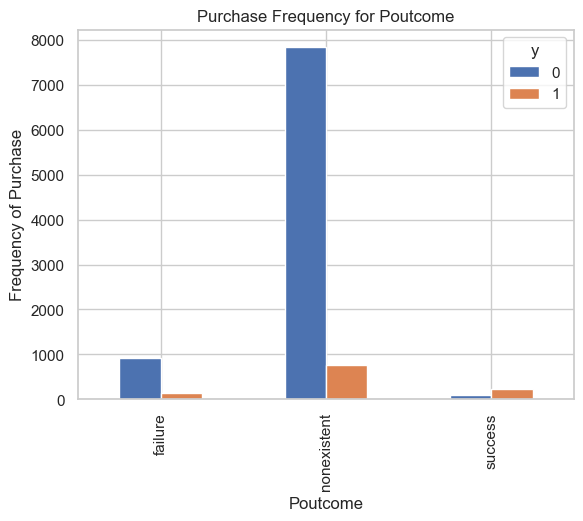

In [145]:
# итоги предыдущей маркетинговой кампании 
# poutcome

pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('poutcome_purchase_table.png') # нормальное прогнозирование

In [146]:
# Итого: хорошее прогнозирование - месяц, возраст, работа
# нормальное - образование, итоги предыдущ компании, 
# плохое - семейное положение, день недели

In [149]:
# переведем категориальные данные в фиктивные данные (0, 1)
categ_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in categ_vars:
    categ_list='var'+'_'+var
    categ_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(categ_list)
    data=data1
categ_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categ_vars]

# категориальные переменные заменяются dummy переменными, что позволяет использовать их в анализе данных

In [150]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_m

In [191]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  12338
Number of no subscription in oversampled data 6169
Number of subscription 6169
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
os_data_X_scaled = scaler.fit_transform(os_data_X)

data_final_vars = data_final.columns.values.tolist()
y = ['y']
X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X_scaled, os_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False False False False False
 False False False False False False False False False False  True  True
  True False False False False  True False False  True  True  True False
  True  True  True  True  True  True False False False False False False
 False False False False  True  True  True  True  True False False False]
[38  1 34 32 37  1  9 36 39 35 18 22 16 23 17 14 21 20 13 15 19 33  1  1
  1 40  4  3 41  1  2  5  1  1  1 10  1  1  1  1  1  1 28 12 31 24 25 11
 30 27 26 29  1  1  1  1  1  8  7  6]


In [199]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [204]:
import numpy as np
import statsmodels.api as sm

X = np.asarray(X).astype(float)
y = np.asarray(y).astype(float)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.411162
         Iterations 20
                                   Results: Logit
Model:                      Logit                  Method:                 MLE       
Dependent Variable:         y                      Pseudo R-squared:       0.407     
Date:                       2024-03-29 06:41       AIC:                    10185.8286
No. Observations:           12338                  BIC:                    10334.2374
Df Model:                   19                     Log-Likelihood:         -5072.9   
Df Residuals:               12318                  LL-Null:                -8552.0   
Converged:                  1.0000                 LLR p-value:            0.0000    
No. Iterations:             20.0000                Scale:                  1.0000    
-------------------------------------------------------------------------------------
     Coef.        Std.Err.        z     P>|z|         [0.025             

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [209]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83
